In [2]:
import os
import sys

import rasterio
import rasterio.mask

import rioxarray as rxr
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from PIL import Image

In [13]:
sys.path.append('..')
import src.preprocessing as preprocessing

### Create tif with water and slope filters

In [6]:
path_to_data = os.path.join("..", "data", "processed_files", "tifs","filter_water.tif")
path_to_save = os.path.join("..", "data", "processed_files", "tifs","filter_water_rev.tif")

In [4]:
Water = rxr.open_rasterio(path_to_data).squeeze()  # type: ignore
Water = xr.where(
        Water == 0, 1, 0) 

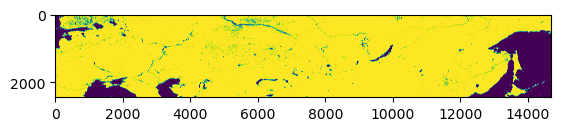

In [17]:
Water = rxr.open_rasterio(path_to_save).squeeze()  # type: ignore
plt.imshow(Water)

In [16]:
src = rasterio.open(path_to_data)
Water = src.read(1)
Water = np.where(Water==0,1, 0)

with rasterio.open(path_to_save, "w", **src.profile) as dst:
                # Read the data and write it to the output raster
                dst.write(Water,1)

### Draft

In [10]:
data

array([[0.9872497 , 0.00172623, 0.00662598, 0.00439809],
       [0.98690015, 0.00177009, 0.00683777, 0.0044919 ],
       [0.98649085, 0.00182237, 0.00708243, 0.00460441],
       ...,
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan]], dtype=float32)

In [9]:
import numpy as np
import os

path_to_data = os.path.join("..", "data", "results", "2040_2050","mlp_ssp245_CNRM_prob.npy")#average_prob.npy")
data = np.load(path_to_data, allow_pickle = True)

### Plot CMIP and their average

In [4]:
path = os.path.join("..", "data", "processed_files", "tifs")

In [43]:
# Define data folder 
path = os.path.join("..", "data", "processed_files", "tifs")

# Selected regions
rectangles = [(45, 121, 42.5, 128),     # [ul_corner_y, ul_corner_x, lr_corner_y, lr_corner_x]
            (53, 21, 45, 45),
            (63, 61, 57.5, 80)]

names = ["Nothern China", "Eastern Europe", "Nothern Russia"]

In [58]:
decades = ["2000_2010", "2022_2032", "2040_2050"]
linestyles = ["solid", "dashed", "dotted"]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
vars = ["daily_temp_gt_6C_days", "monthly_avg_temp","air_temp_cross_0C_days"]
models = ["CMCC", "CNRM", "MRI"]
ssps = ["ssp126", "ssp245", "ssp585"]
var = vars[2]

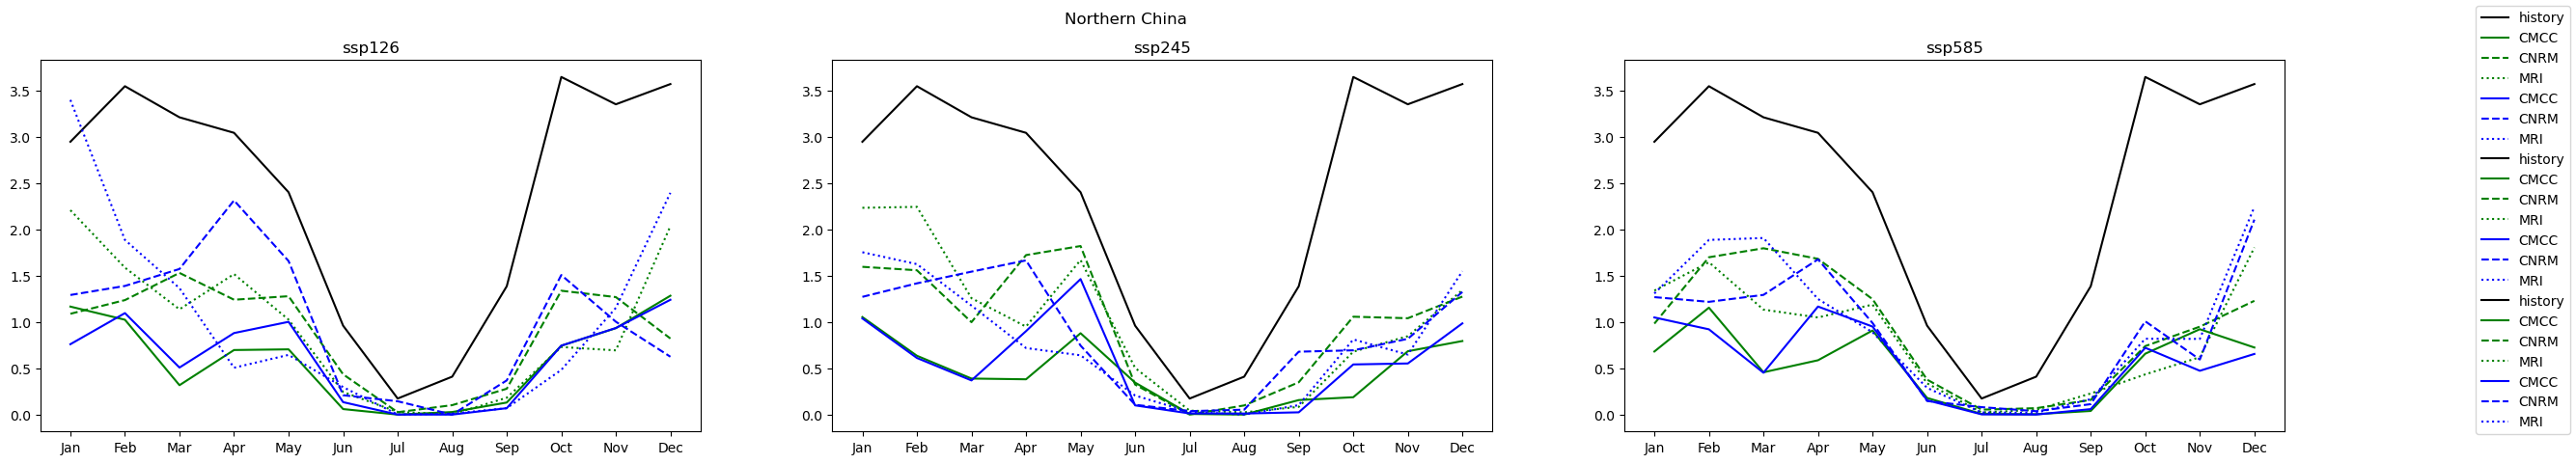

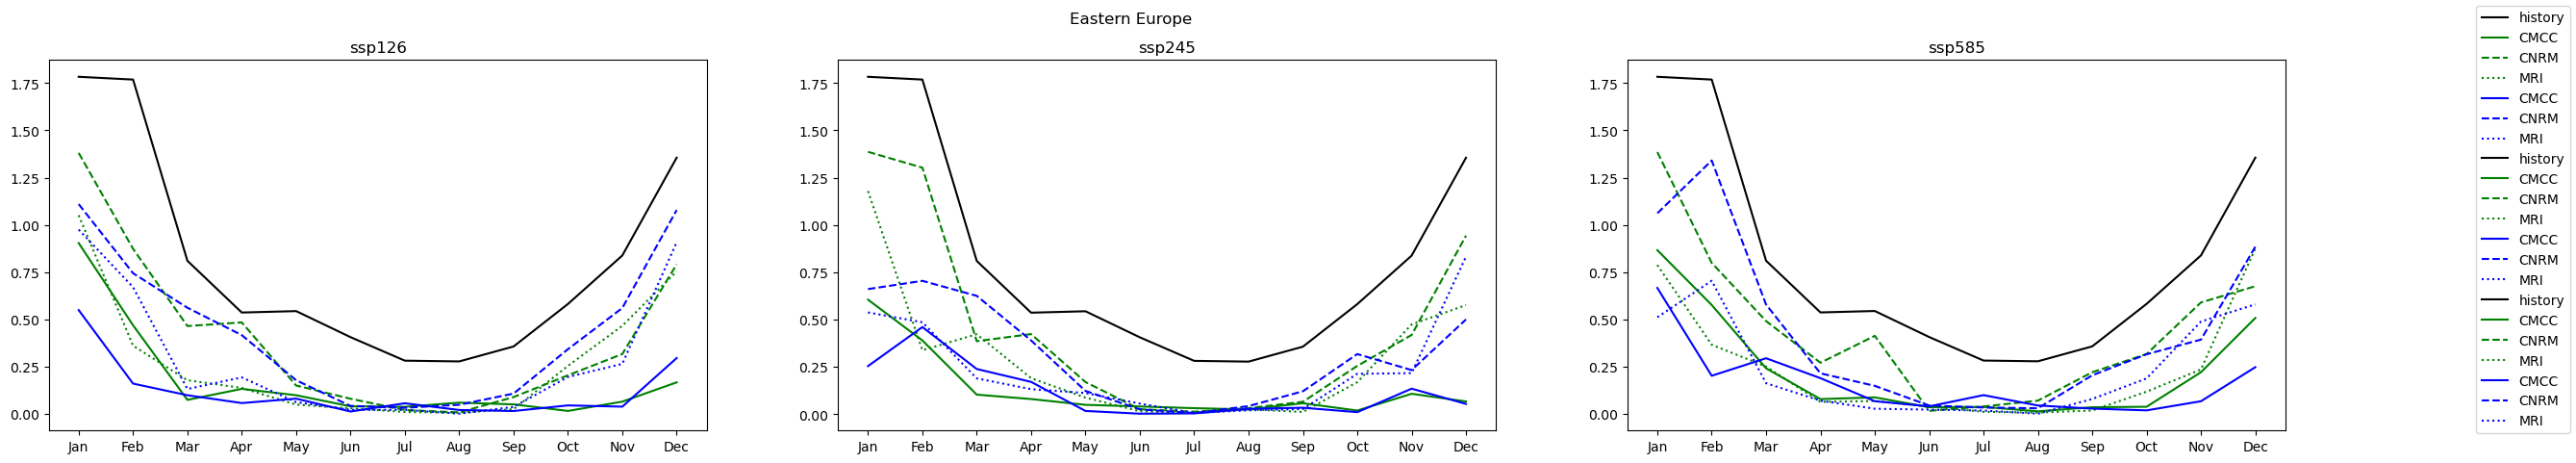

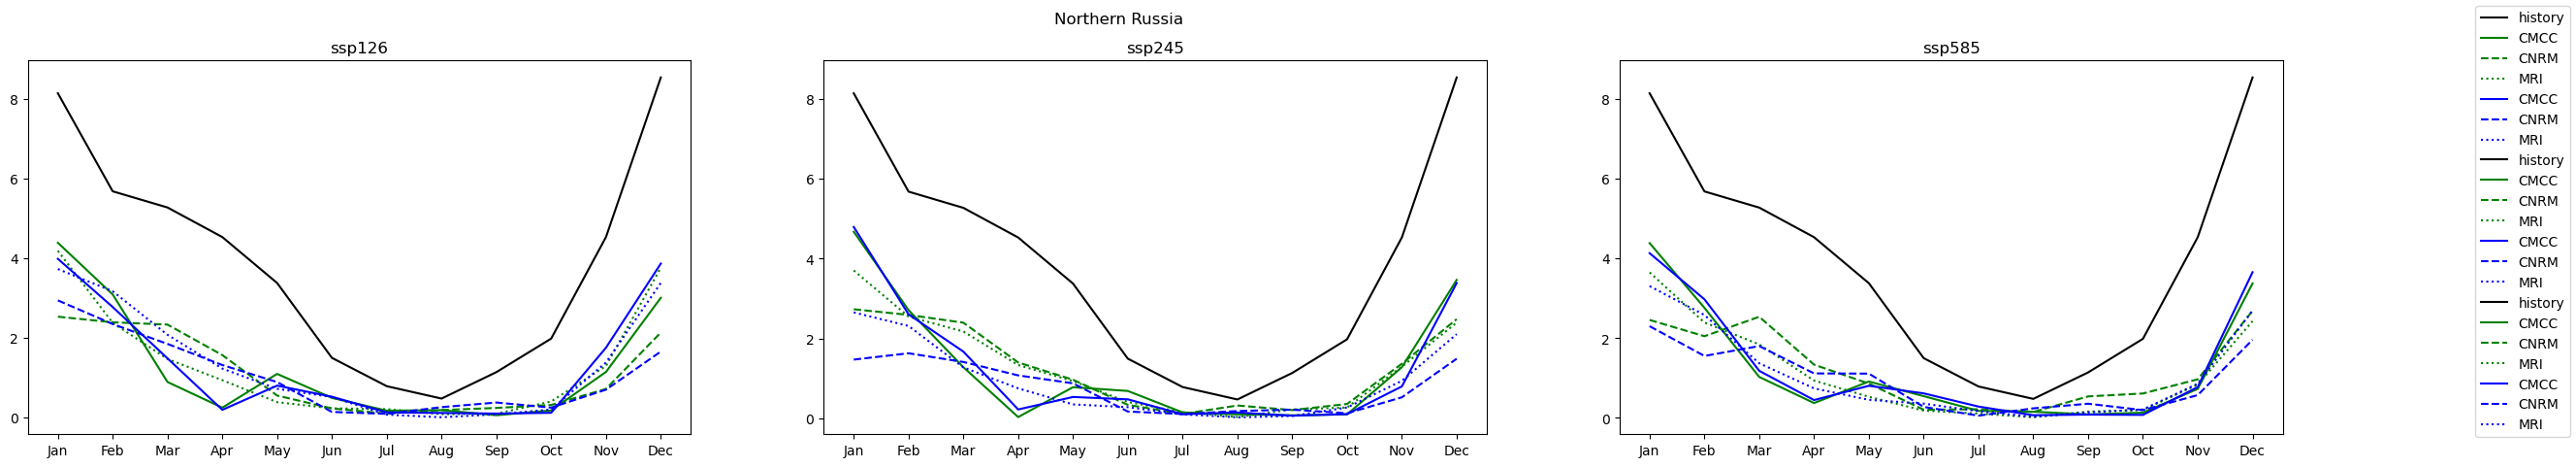

In [56]:
var = "daily_temp_gt_6C_days"
for rect, name in zip(rectangles, names):
    # Define coordinate bounds
    left = rect[1]
    top = rect[0]
    right = rect[3]
    bottom = rect[2]

    # Create object holding all crop features
    bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

    for i, ssp in enumerate(ssps):
        for decade, color in zip(decades, ["black", "green", "blue"]):
            if decade == "2000_2010":
                path_to_source = os.path.join(path, decade, var + ".tif")

                # load the raster, mask it by the polygon and crop it
                with rasterio.open(path_to_source) as src:
                    out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

                data_avg = np.mean(out_image, axis=(1,2))
                ax[i].plot(months, data_avg, label = "history", color=color)
                
            else:
                for model, linestyle in zip(models, linestyles):
                    path_to_source = os.path.join(path, decade, ssp, model, var + ".tif")
                
                    # load the raster, mask it by the polygon and crop it
                    with rasterio.open(path_to_source) as src:
                        out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

                    data_avg = np.mean(out_image, axis=(1,2))
                    ax[i].plot(months, data_avg, label = model, color=color, linestyle = linestyle)
        ax[i].set_title(ssp)

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='right center')
    fig.suptitle(name)
    fig.legend()
    plt.show()

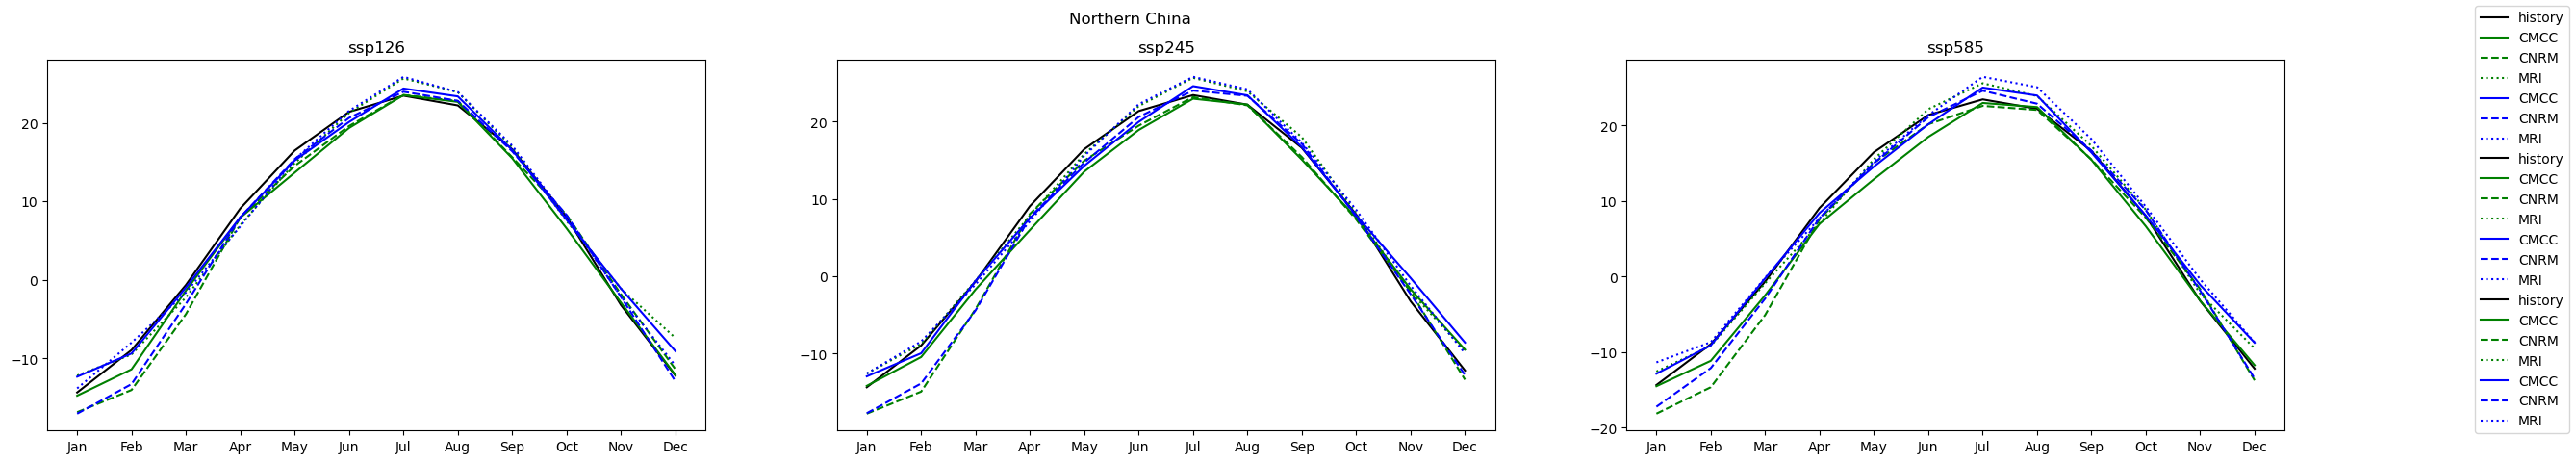

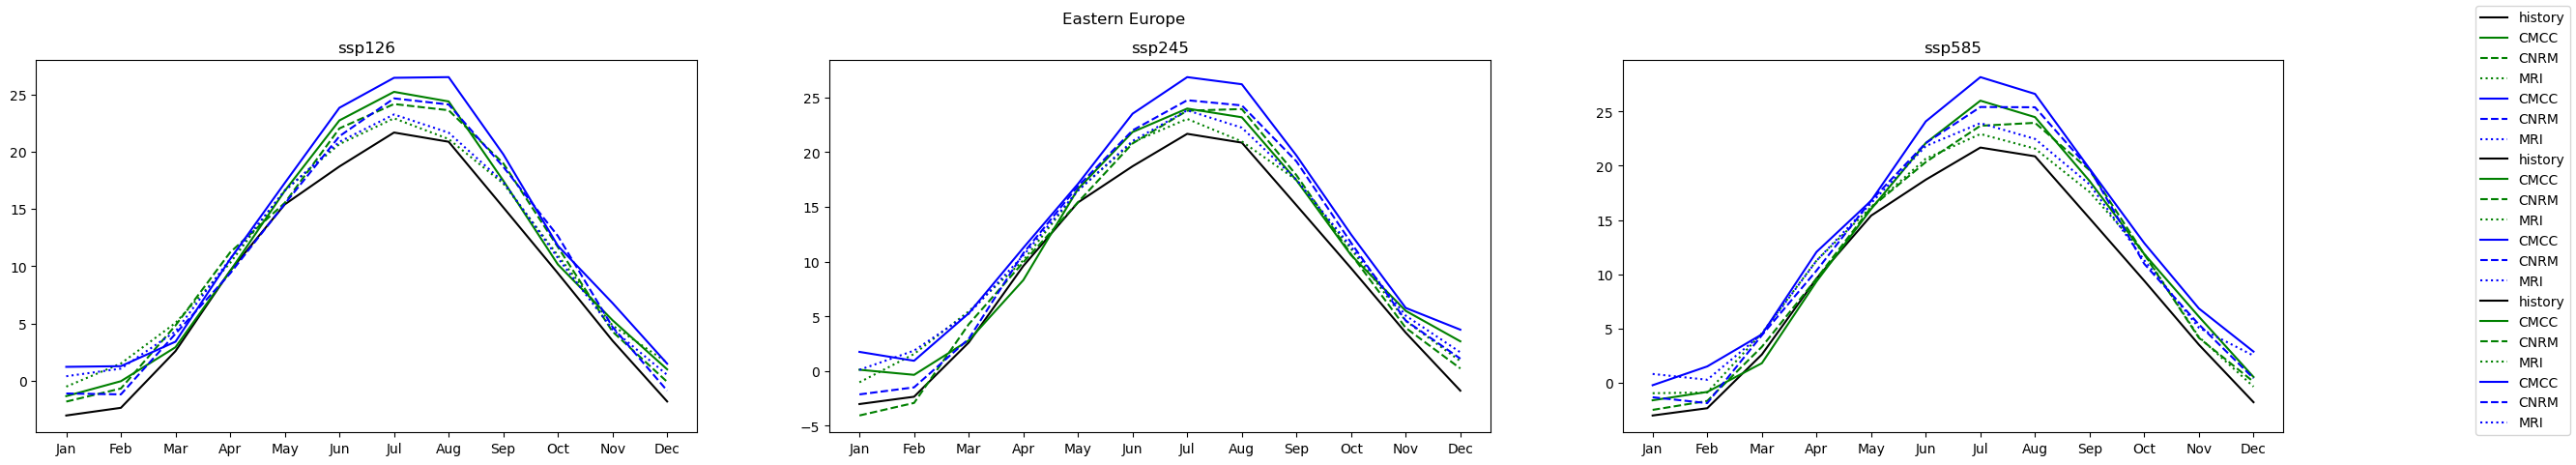

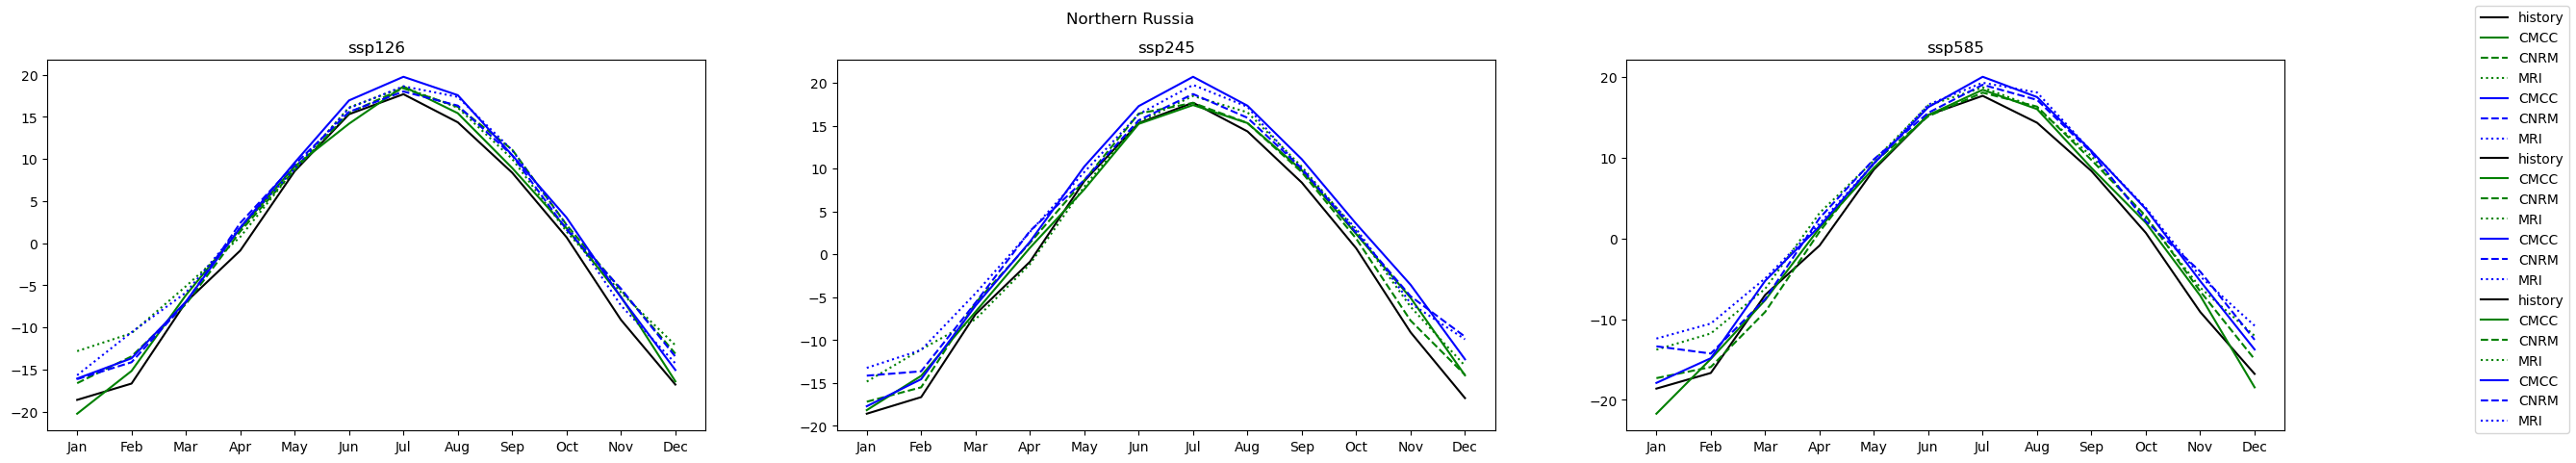

In [60]:
var = "monthly_avg_temp"
for rect, name in zip(rectangles, names):
    # Define coordinate bounds
    left = rect[1]
    top = rect[0]
    right = rect[3]
    bottom = rect[2]

    # Create object holding all crop features
    bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

    for i, ssp in enumerate(ssps):
        for decade, color in zip(decades, ["black", "green", "blue"]):
            if decade == "2000_2010":
                path_to_source = os.path.join(path, decade, var + ".tif")

                # load the raster, mask it by the polygon and crop it
                with rasterio.open(path_to_source) as src:
                    out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

                data_avg = np.mean(out_image, axis=(1,2))
                ax[i].plot(months, data_avg, label = "history", color=color)
                
            else:
                for model, linestyle in zip(models, linestyles):
                    path_to_source = os.path.join(path, decade, ssp, model, var + ".tif")
                
                    # load the raster, mask it by the polygon and crop it
                    with rasterio.open(path_to_source) as src:
                        out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

                    data_avg = np.mean(out_image, axis=(1,2))
                    ax[i].plot(months, data_avg, label = model, color=color, linestyle = linestyle)
        ax[i].set_title(ssp)

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='right center')
    fig.suptitle(name)
    fig.legend()
    plt.show()

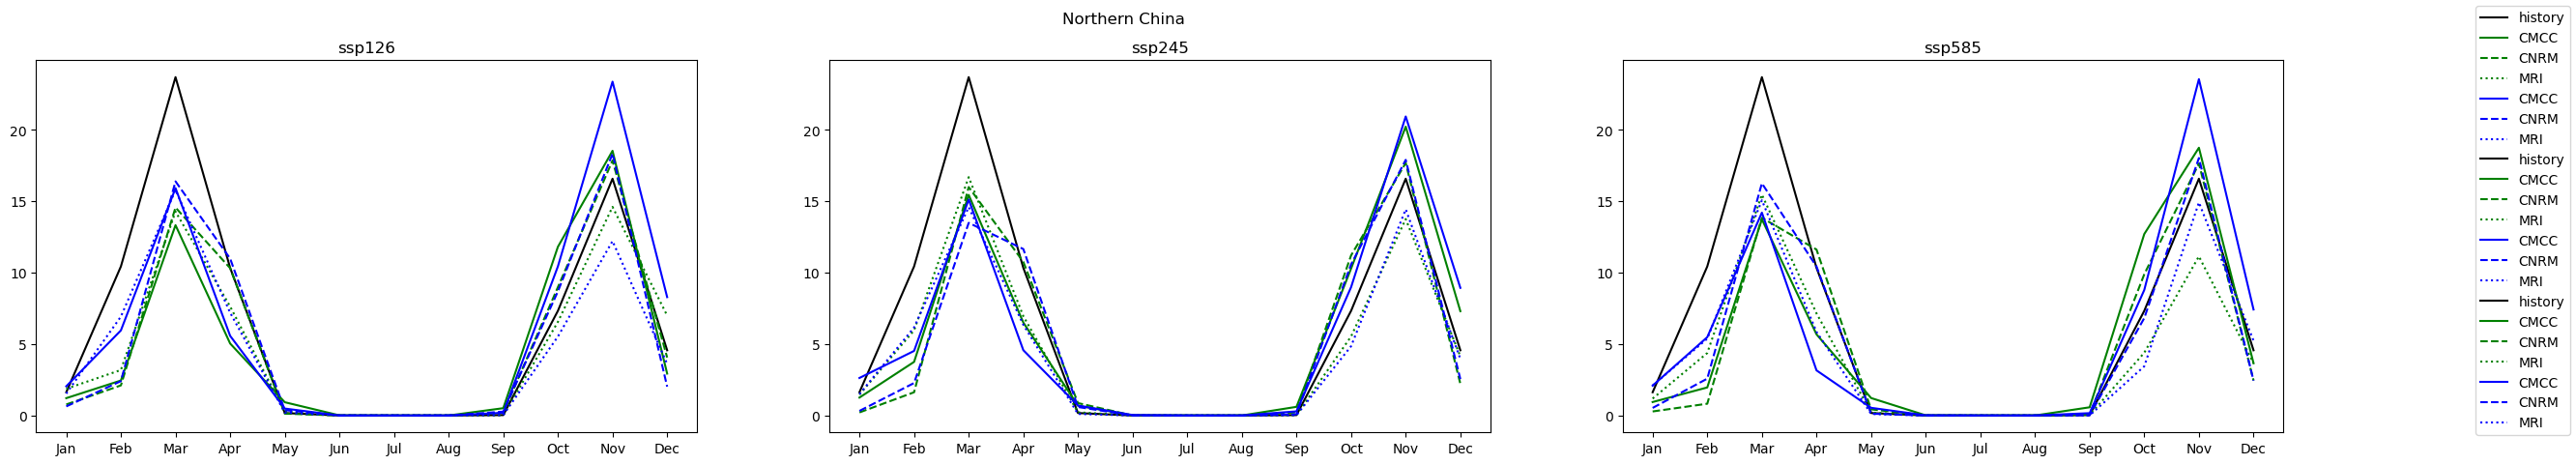

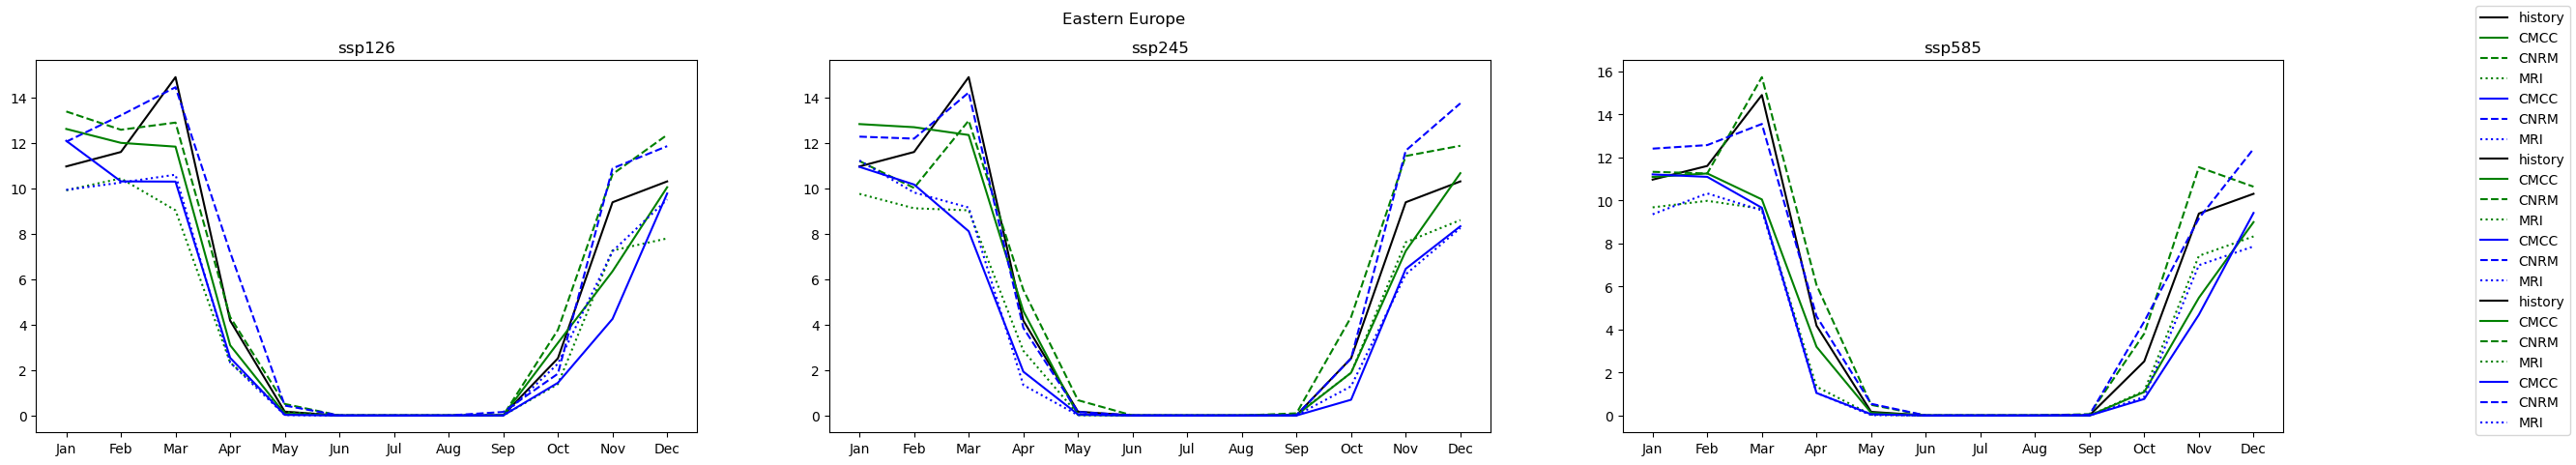

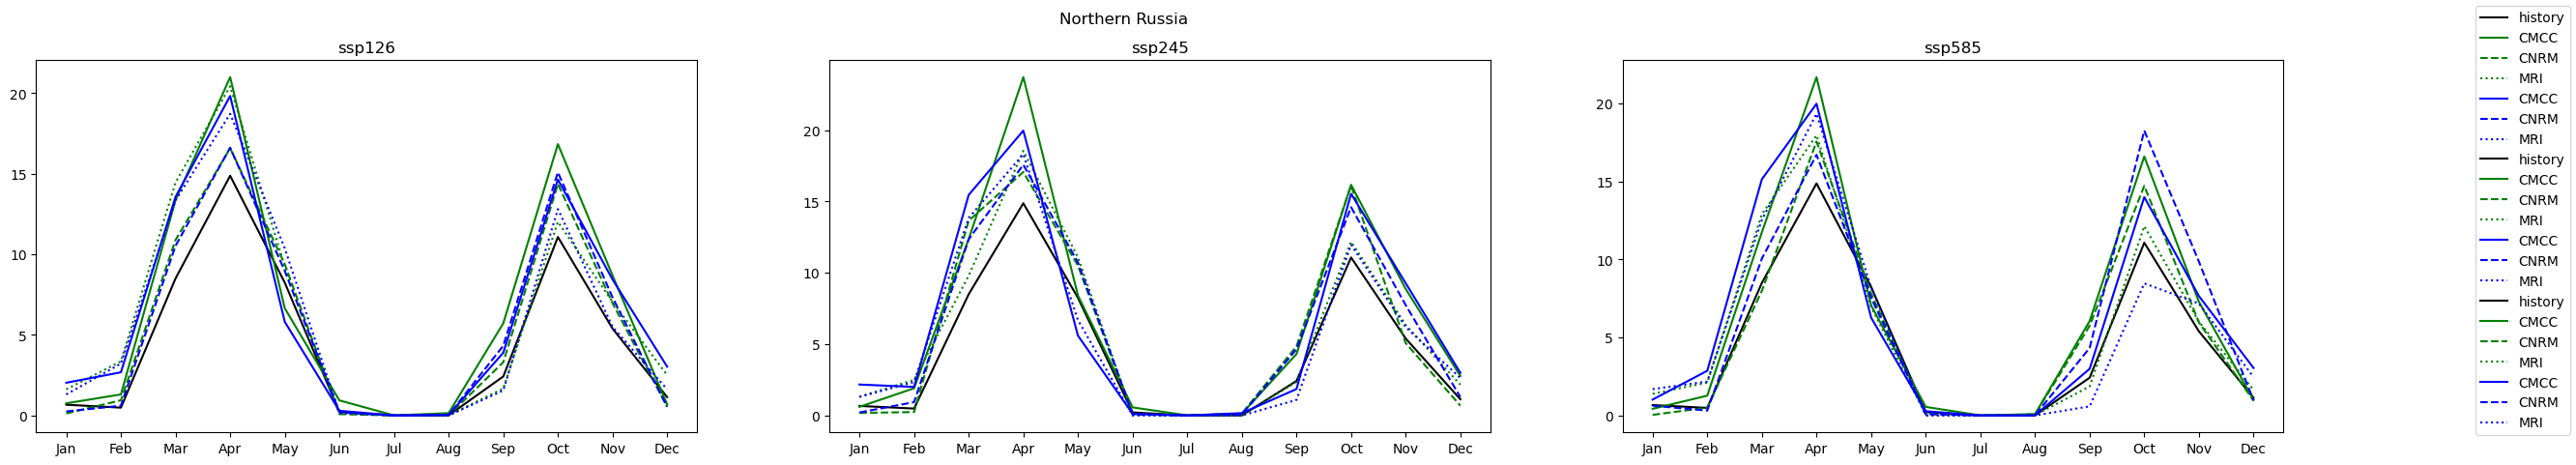

In [59]:
var  = "air_temp_cross_0C_days" 
for rect, name in zip(rectangles, names):
    # Define coordinate bounds
    left = rect[1]
    top = rect[0]
    right = rect[3]
    bottom = rect[2]

    # Create object holding all crop features
    bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

    for i, ssp in enumerate(ssps):
        for decade, color in zip(decades, ["black", "green", "blue"]):
            if decade == "2000_2010":
                path_to_source = os.path.join(path, decade, var + ".tif")

                # load the raster, mask it by the polygon and crop it
                with rasterio.open(path_to_source) as src:
                    out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

                data_avg = np.mean(out_image, axis=(1,2))
                ax[i].plot(months, data_avg, label = "history", color=color)
                
            else:
                for model, linestyle in zip(models, linestyles):
                    path_to_source = os.path.join(path, decade, ssp, model, var + ".tif")
                
                    # load the raster, mask it by the polygon and crop it
                    with rasterio.open(path_to_source) as src:
                        out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

                    data_avg = np.mean(out_image, axis=(1,2))
                    ax[i].plot(months, data_avg, label = model, color=color, linestyle = linestyle)
        ax[i].set_title(ssp)

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='right center')
    fig.suptitle(name)
    fig.legend()
    plt.show()

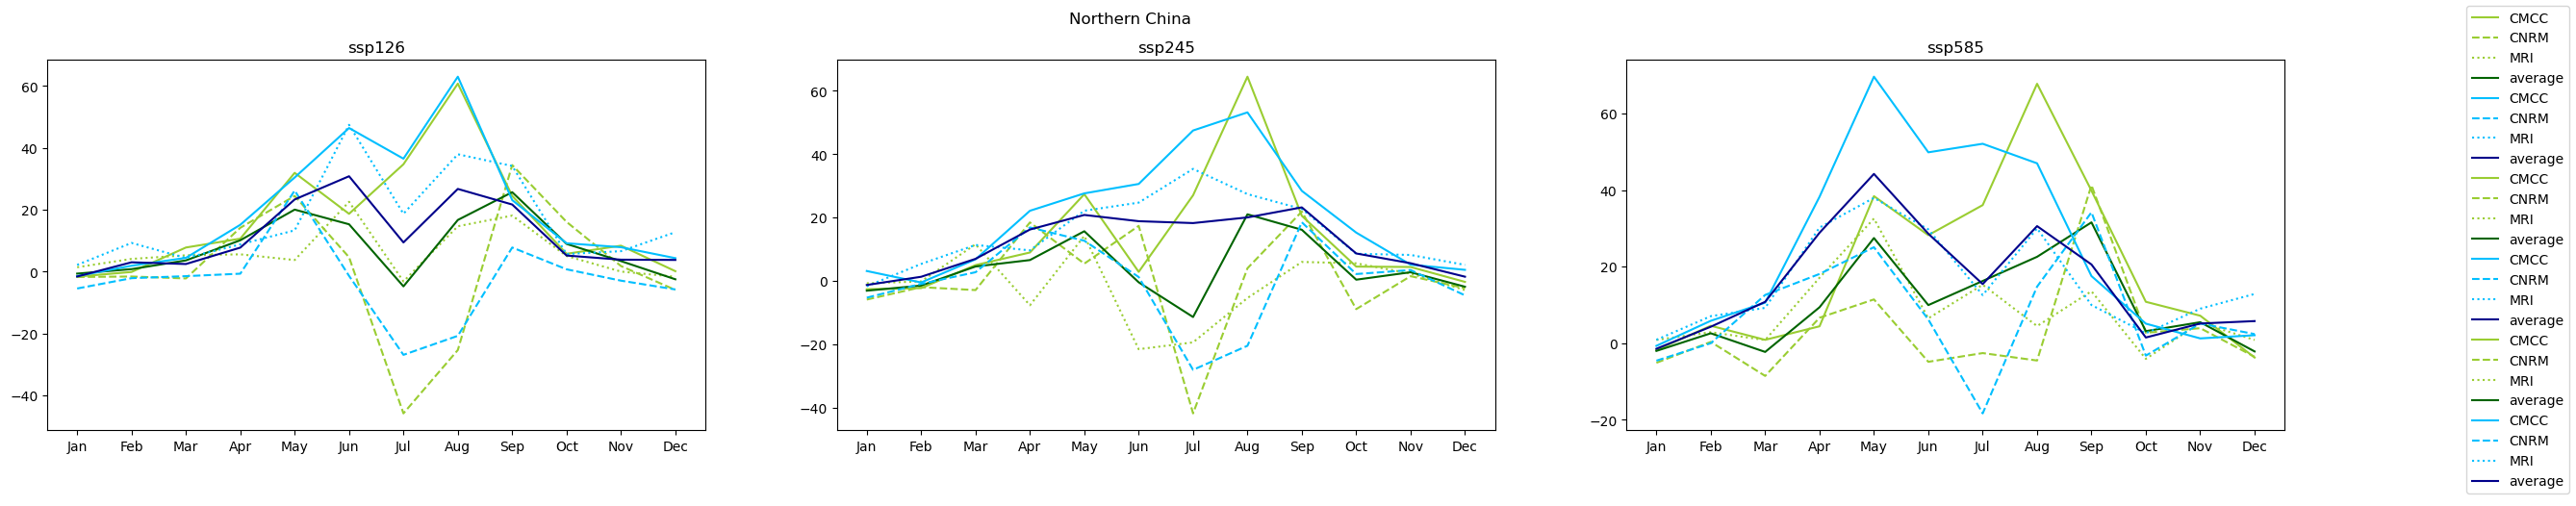

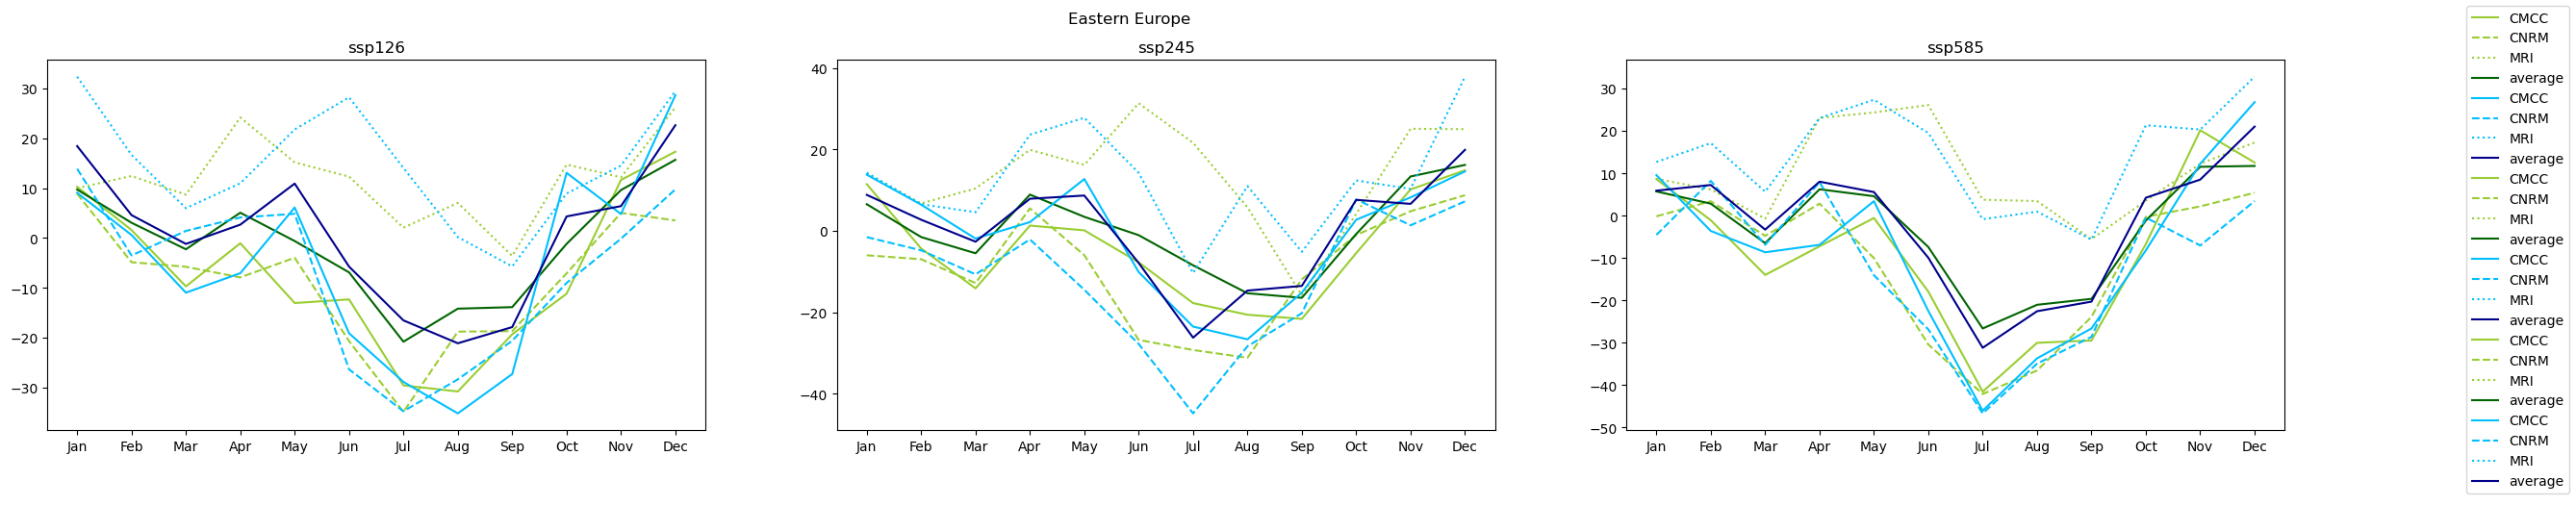

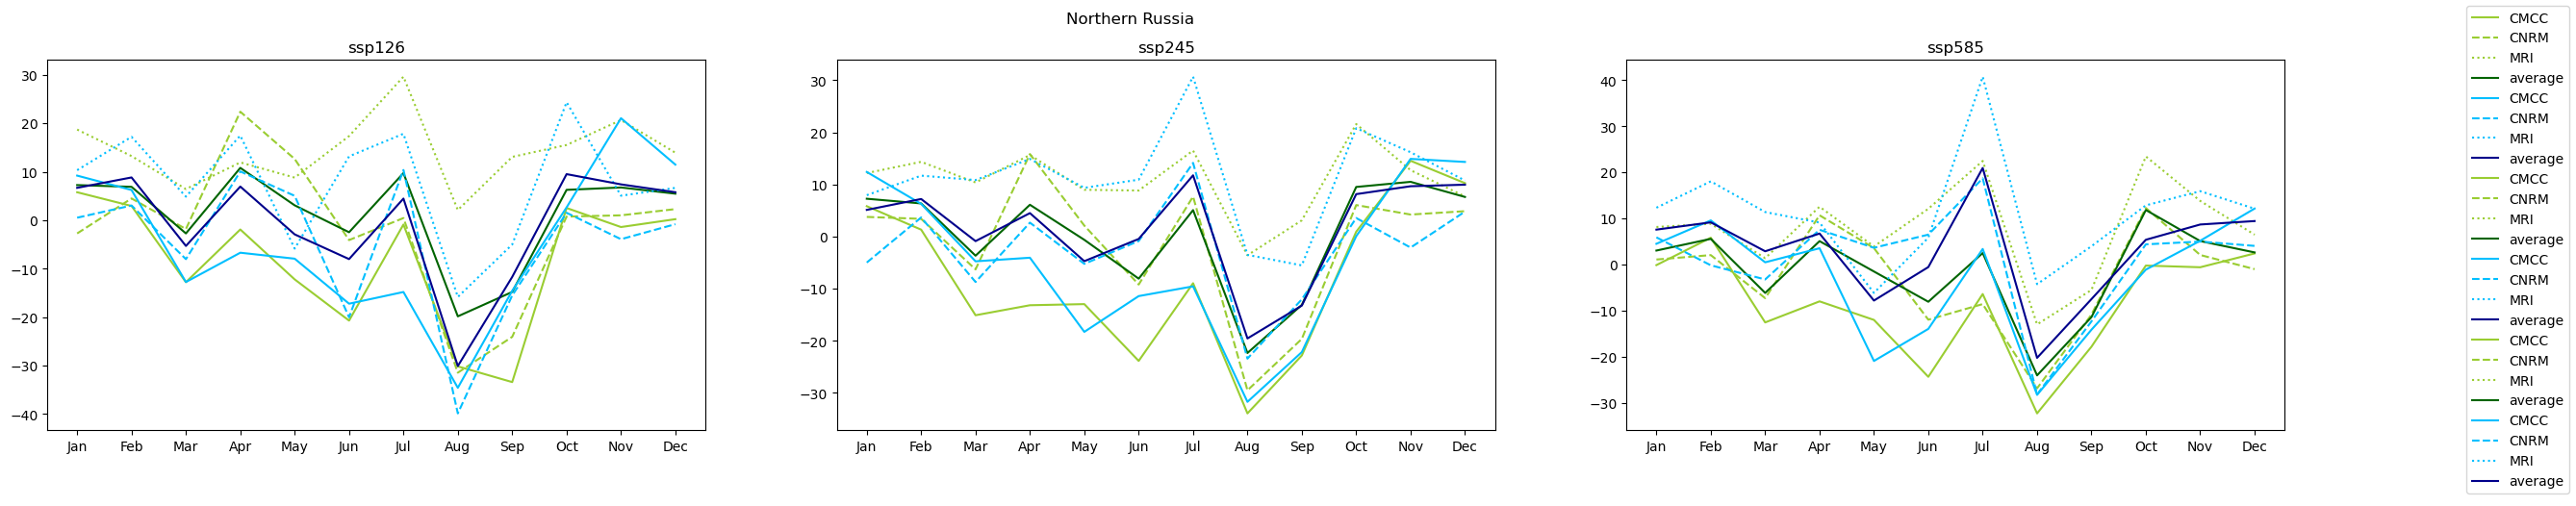

In [93]:
var = "monthly_precip"
for rect, name in zip(rectangles, names):
    # Define coordinate bounds
    left = rect[1]
    top = rect[0]
    right = rect[3]
    bottom = rect[2]

    # Create object holding all crop features
    bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

    for i, ssp in enumerate(ssps):
        for decade, color, color_avg in zip(decades[1:], ["yellowgreen", "deepskyblue"], ["darkgreen", "darkblue"]):
            # if decade == "2000_2010":
            path_to_source = os.path.join(path, "2000_2010", var + ".tif")

            # load the raster, mask it by the polygon and crop it
            with rasterio.open(path_to_source) as src:
                data_hist, hist_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

            # data_hist = np.mean(out_image, axis=(1,2))
            # ax[i].plot(months, data_avg, label = "history", color=color)
                
            # else:
            data_models = np.empty(data_hist.shape+(3,))

            for m, (model, linestyle) in enumerate(zip(models, linestyles)):
                path_to_source = os.path.join(path, decade, ssp, model, var + ".tif")
            
                # load the raster, mask it by the polygon and crop it
                with rasterio.open(path_to_source) as src:
                    out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)
                data = out_image - data_hist
                data_avg = np.mean(data, axis=(1,2))
                data_models[:,:,:,m] = data
                ax[i].plot(months, data_avg, label = model, color=color, linestyle = linestyle)

            data_models_avg = np.mean(data_models, axis = (1,2,3))

            ax[i].plot(months, data_models_avg, label = "average", color=color_avg)
        ax[i].set_title(ssp)

    fig.suptitle(name)
    fig.legend()
    plt.show()

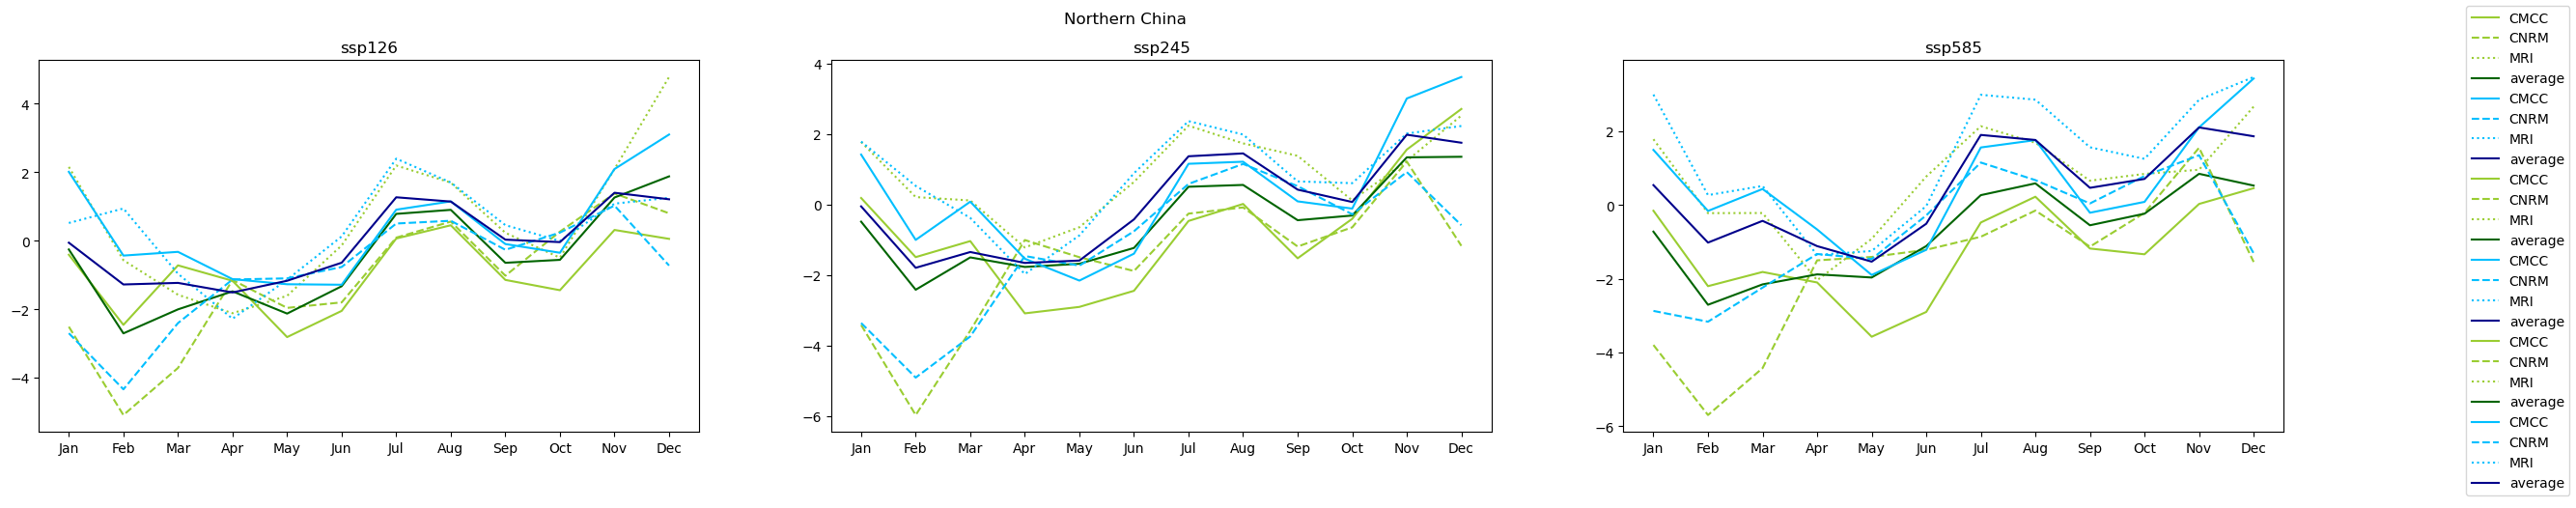

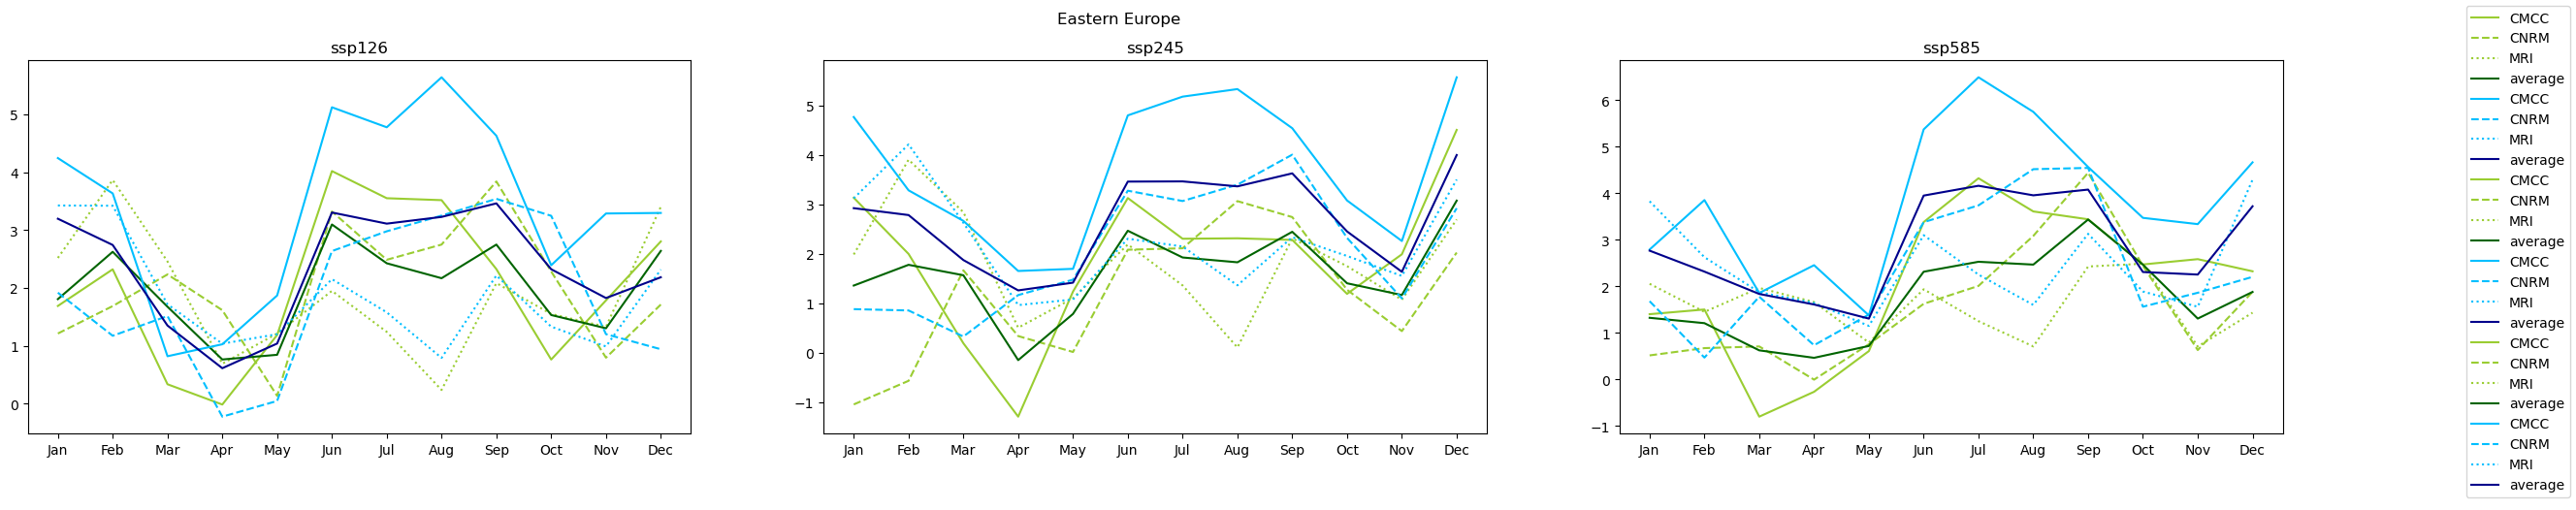

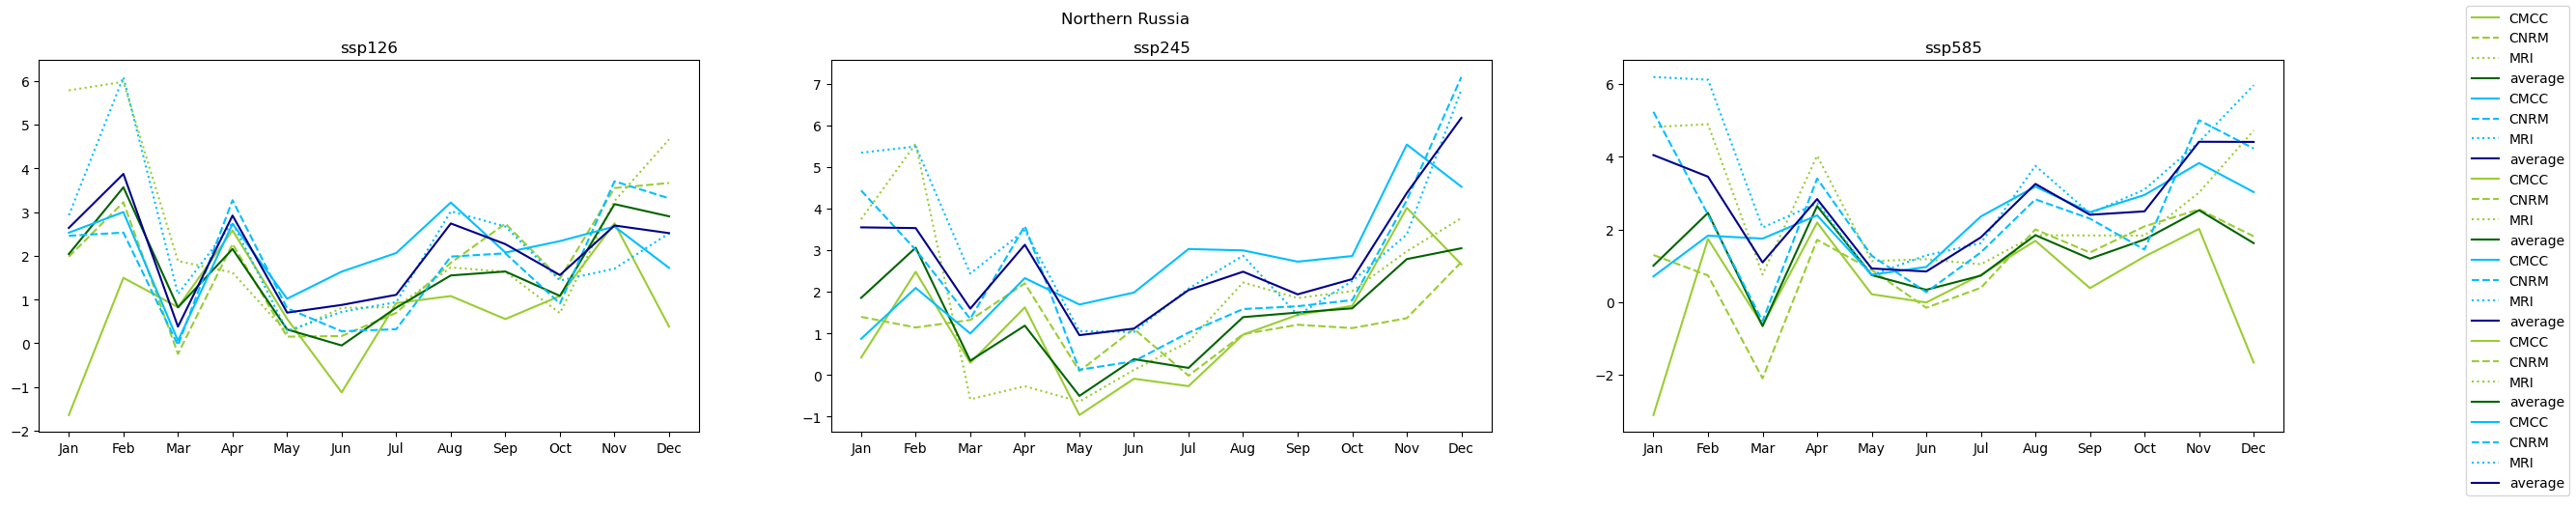

In [94]:
var = "monthly_avg_temp"
for rect, name in zip(rectangles, names):
    # Define coordinate bounds
    left = rect[1]
    top = rect[0]
    right = rect[3]
    bottom = rect[2]

    # Create object holding all crop features
    bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

    for i, ssp in enumerate(ssps):
        for decade, color, color_avg in zip(decades[1:], ["yellowgreen", "deepskyblue"], ["darkgreen", "darkblue"]):
            path_to_source = os.path.join(path, "2000_2010", var + ".tif")

            with rasterio.open(path_to_source) as src:
                data_hist, hist_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

            data_models = np.empty(data_hist.shape+(3,))

            for m, (model, linestyle) in enumerate(zip(models, linestyles)):
                path_to_source = os.path.join(path, decade, ssp, model, var + ".tif")
            
                # load the raster, mask it by the polygon and crop it
                with rasterio.open(path_to_source) as src:
                    out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)
                data = out_image - data_hist
                data_avg = np.mean(data, axis=(1,2))
                data_models[:,:,:,m] = data
                ax[i].plot(months, data_avg, label = model, color=color, linestyle = linestyle)

            data_models_avg = np.mean(data_models, axis = (1,2,3))

            ax[i].plot(months, data_models_avg, label = "average", color=color_avg)
        ax[i].set_title(ssp)

    fig.suptitle(name)
    fig.legend()
    plt.show()

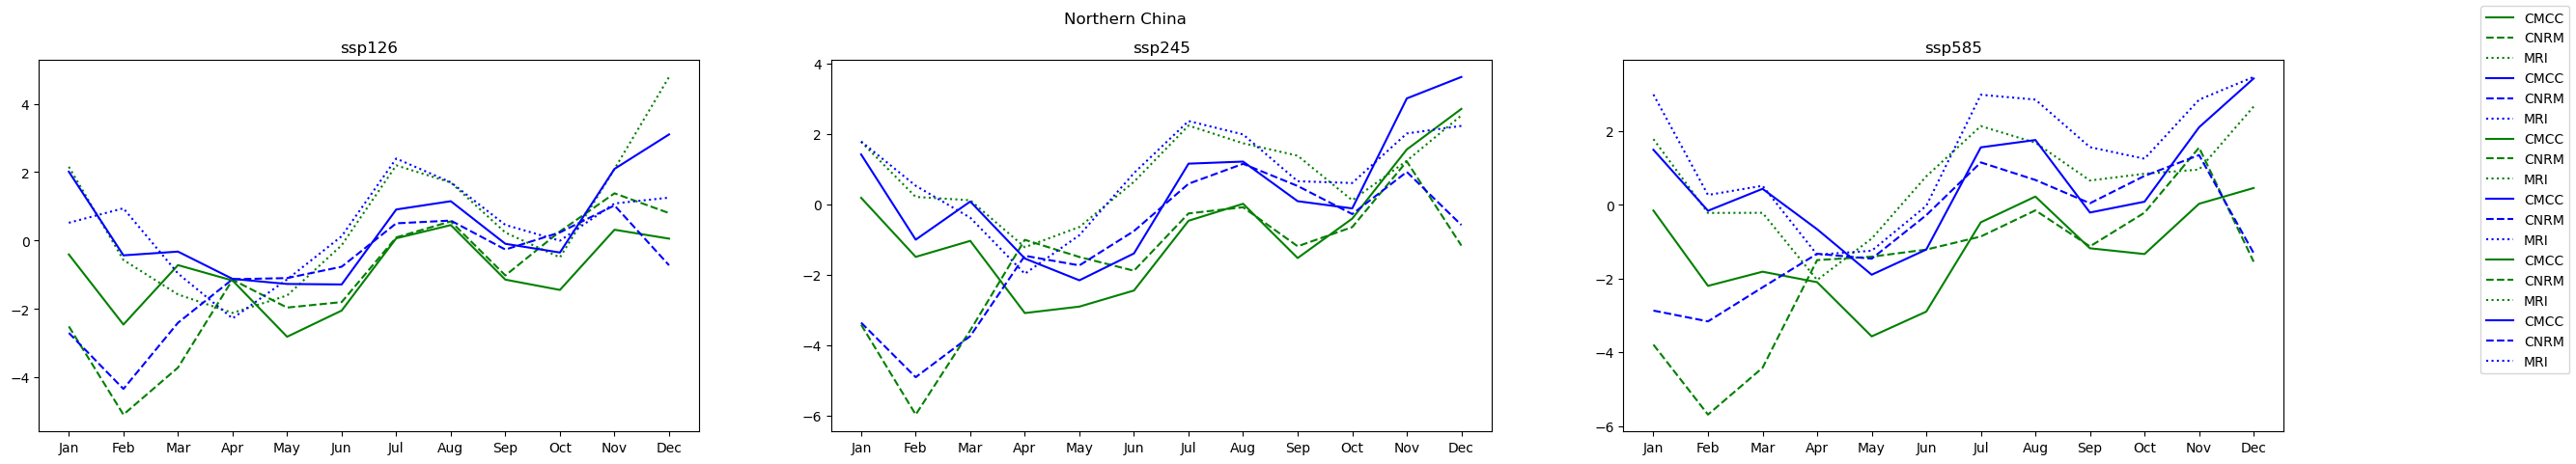

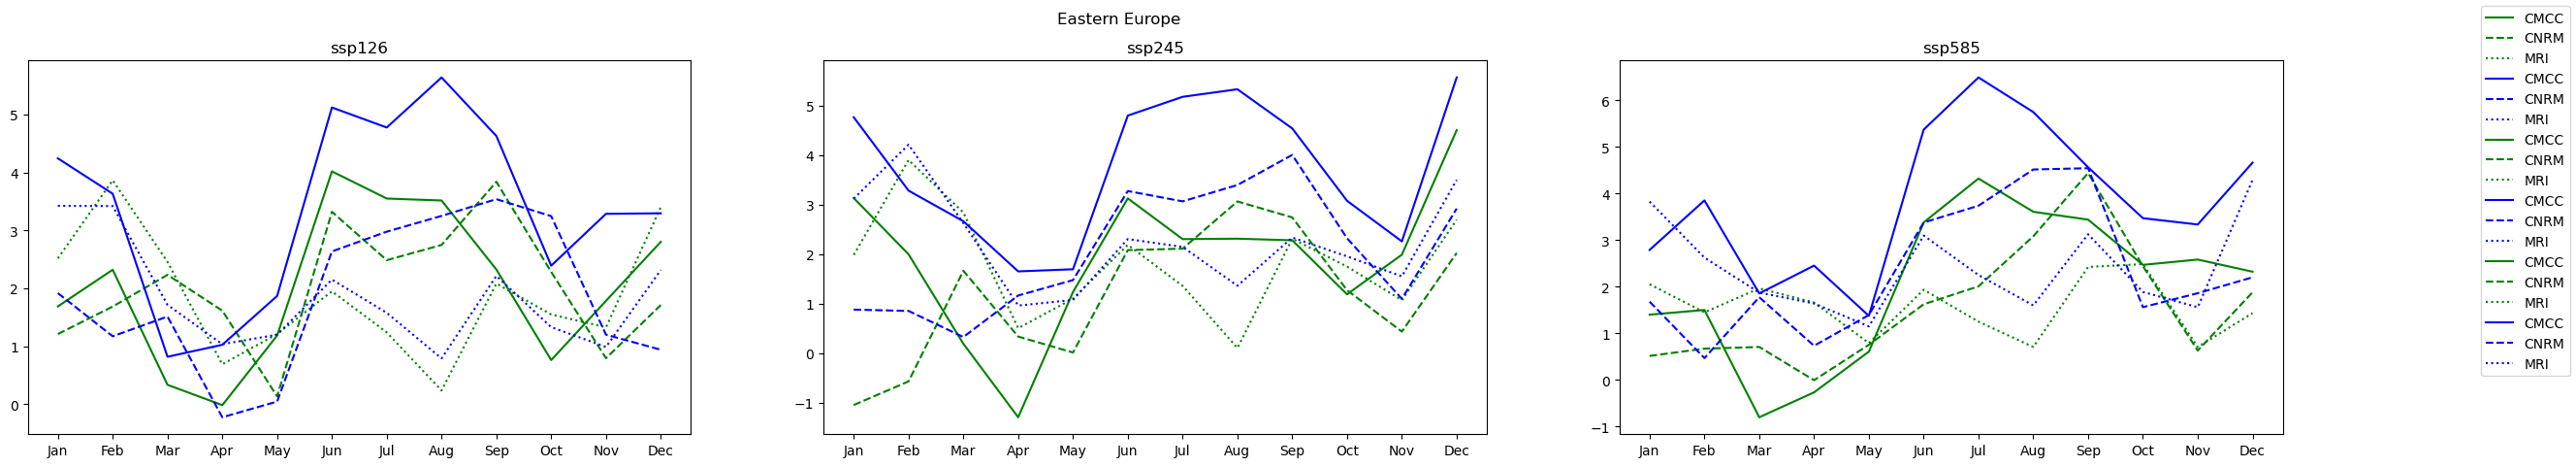

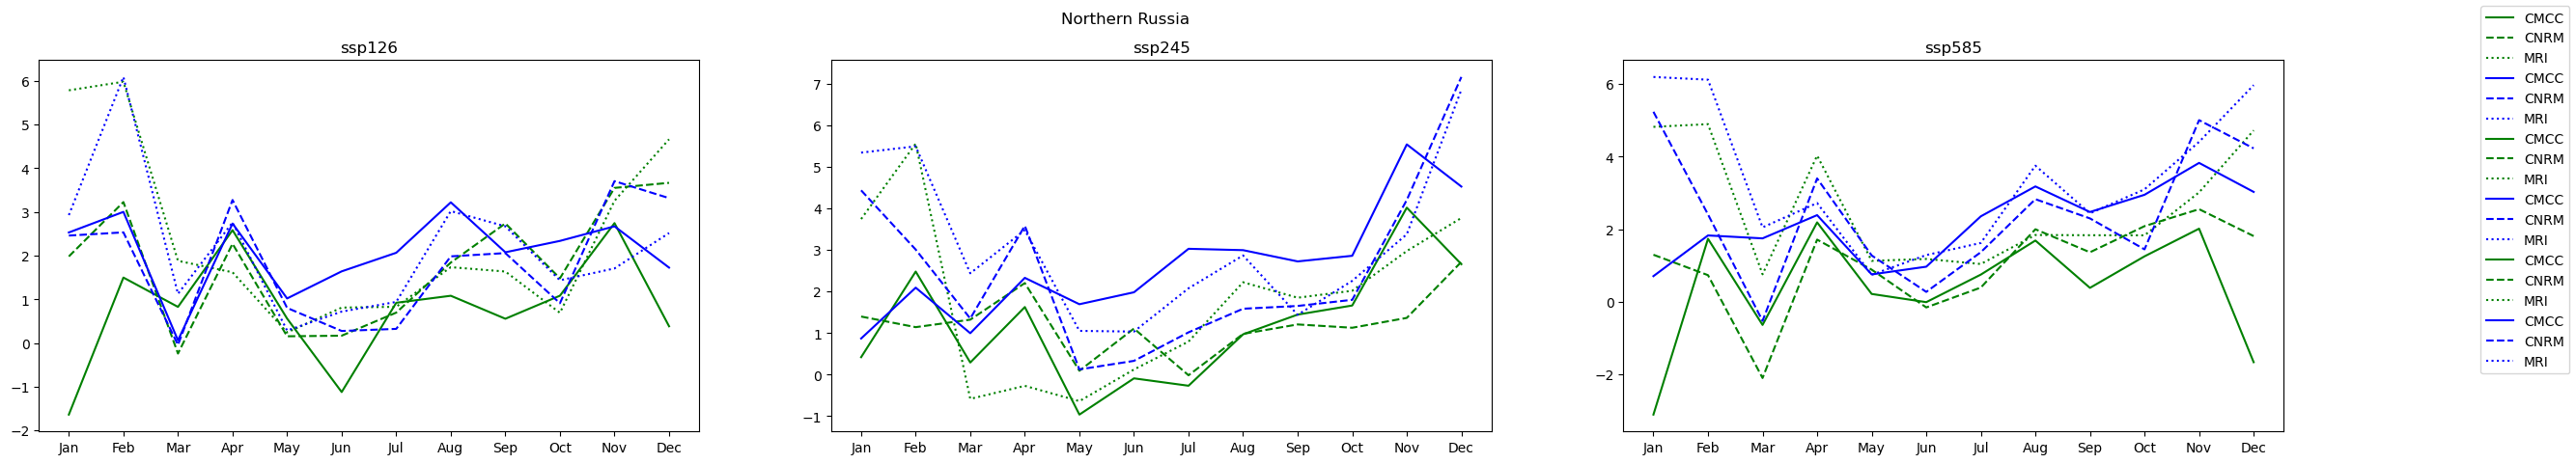

In [63]:
var = "monthly_avg_temp"
for rect, name in zip(rectangles, names):
    # Define coordinate bounds
    left = rect[1]
    top = rect[0]
    right = rect[3]
    bottom = rect[2]

    # Create object holding all crop features
    bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

    for i, ssp in enumerate(ssps):
        for decade, color in zip(decades[1:], ["green", "blue"]):
            path_to_source = os.path.join(path, "2000_2010", var + ".tif")

            # load the raster, mask it by the polygon and crop it
            with rasterio.open(path_to_source) as src:
                data_hist, hist_transform = rasterio.mask.mask(src, [bound.poly], crop=True)

            for model, linestyle in zip(models, linestyles):
                path_to_source = os.path.join(path, decade, ssp, model, var + ".tif")
            
                # load the raster, mask it by the polygon and crop it
                with rasterio.open(path_to_source) as src:
                    out_image, out_transform = rasterio.mask.mask(src, [bound.poly], crop=True)
                data = out_image - data_hist
                data_avg = np.mean(data, axis=(1,2))
                ax[i].plot(months, data_avg, label = model, color=color, linestyle = linestyle)
        ax[i].set_title(ssp)

    fig.suptitle(name)
    fig.legend()
    plt.show()